In [ ]:
# House Price Prediction - Solution 1

## 1. Introduction
# In this notebook, we will build a simple linear regression model to predict house prices based on various features.

In [1]:
## 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
## 3. Load Dataset
try:
    data = pd.read_csv('House_Prices/train.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the path.")
    data = None

Data loaded successfully!



First 5 rows of the data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePr

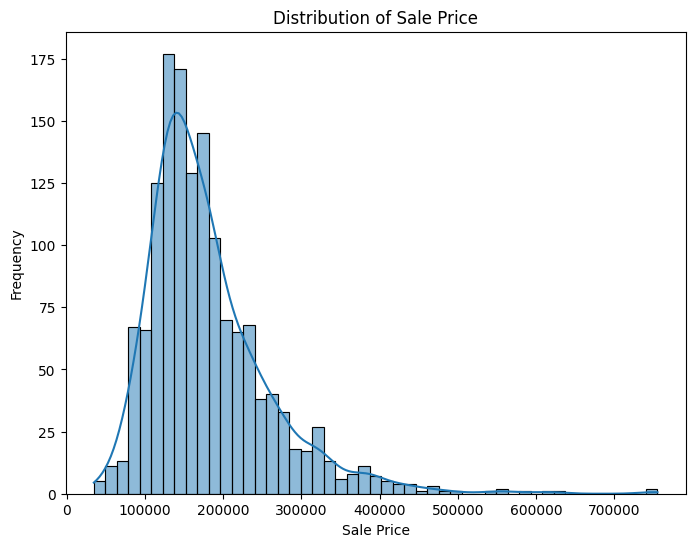


Missing values:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [3]:
## 4. Exploratory Data Analysis (EDA)
if data is not None:
    # Display the first few rows of the data
    print("\nFirst 5 rows of the data:")
    print(data.head())

    # Get information about the data types and non-null values
    print("\nData information:")
    print(data.info())

    # Get descriptive statistics of the numerical features
    print("\nDescriptive statistics:")
    print(data.describe())

    # Visualize the distribution of the target variable (e.g., SalePrice)
    plt.figure(figsize=(8, 6))
    sns.histplot(data['SalePrice'], kde=True)
    plt.title('Distribution of Sale Price')
    plt.xlabel('Sale Price')
    plt.ylabel('Frequency')
    plt.show()

    # Explore relationships between features and the target variable
    # Example: Scatter plot of a numerical feature vs. SalePrice
    # plt.figure(figsize=(8, 6))
    # sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
    # plt.title('Living Area vs. Sale Price')
    # plt.xlabel('Above Ground Living Area (sq ft)')
    # plt.ylabel('Sale Price')
    # plt.show()

    # Explore categorical features
    # Example: Box plot of a categorical feature vs. SalePrice
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
    # plt.title('Sale Price by Neighborhood')
    # plt.xlabel('Neighborhood')
    # plt.ylabel('Sale Price')
    # plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()
    # plt.show()

    # Check for missing values
    print("\nMissing values:")
    print(data.isnull().sum())

    # Visualize missing values (optional)
    # sns.heatmap(data.isnull(), cbar=False)
    # plt.title('Missing Values Heatmap')
    # plt.show()

    # Identify and handle outliers (optional)
    # ...

In [4]:
## 5. Data Preprocessing:
if data is not None:
    # Identify categorical columns
    categorical_cols = data.select_dtypes(include='object').columns
    print("\nCategorical columns identified:")
    print(categorical_cols)

    # Handle missing values (as before)
    # Example: Impute missing numerical values with the mean
    for col in data.select_dtypes(include=np.number).columns:
        if data[col].isnull().any():
            data[col].fillna(data[col].mean(), inplace=True)

    # Example: Impute missing categorical values with the mode
    for col in categorical_cols:
        if data[col].isnull().any():
            data[col].fillna(data[col].mode()[0], inplace=True)

    # Encode categorical features using One-Hot Encoding
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
    print("\nData after one-hot encoding (first 5 rows):")
    print(data.head())

    # Feature scaling (if needed for certain models)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numerical_cols = data.select_dtypes(include=np.number).columns
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    print("\nData after preprocessing (first 5 rows):")
    print(data.head())


Categorical columns identified:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Data after one-hot encoding (first 5 rows):
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60

/var/folders/xy/y2__5y4x7_9_6z7svr2lxkkr0000gn/T/ipykernel_9622/815545399.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/var/folders/xy/y2__5y4x7_9_6z7svr2lxkkr0000gn/T/ipykernel_9622/815545399.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [5]:
## 6. Feature Engineering:
if data is not None:
    # Example: Creating a new feature by combining existing ones
    data['TotalSF'] = data['TotalBsmtSF'] + data['GrLivArea']

    print("\nData after feature engineering (first 5 rows):")
    print(data.head())


Data after feature engineering (first 5 rows):
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.229372 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.451936 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.093110  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.456474 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.633618  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0   1.050994      0.878668    0.511418    0.575425  ...           False   
1   0.156734     -0.429577   -0.574410    1.171992  ...           False   
2   0.984752      0.830215    0.323060    0.092907  ...           False   
3  -1.863632     -0.720298   -0.574410   -0.499274  ...           False   
4   0.951632      0.733308    1.364570    0.463568  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  

In [6]:
## 7. Model Selection and Training:
if data is not None:
    # Define features (X) and target (y)
    X = data.drop('SalePrice', axis=1) # Replace 'SalePrice' with your target variable column name
    y = data['SalePrice']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Select and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    print("\nLinear Regression model trained successfully!")


Linear Regression model trained successfully!



Model Evaluation:
Mean Squared Error (MSE): 0.42
Root Mean Squared Error (RMSE): 0.65
R-squared (R2): 0.66


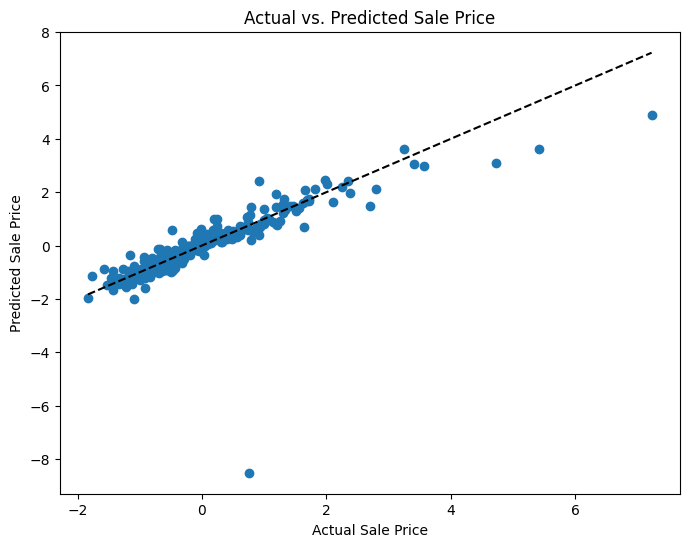

In [7]:
## 8. Model Evaluation:
if data is not None:
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # Visualize predictions vs. actual values (optional)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title('Actual vs. Predicted Sale Price')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Diagonal line
    plt.show()